# Python - Time Series Data with Pandas

In [1]:
from datetime import datetime, timedelta
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pytz

%matplotlib inline

## Generate Time Series Data

In [2]:
# Generate data with time
ts = pd.Series(np.random.rand(100), index=pd.date_range(datetime.now(), periods=100))
ts

2020-11-30 22:15:10.428455    0.142383
2020-12-01 22:15:10.428455    0.641827
2020-12-02 22:15:10.428455    0.153740
2020-12-03 22:15:10.428455    0.403427
2020-12-04 22:15:10.428455    0.977366
                                ...   
2021-03-05 22:15:10.428455    0.737676
2021-03-06 22:15:10.428455    0.801223
2021-03-07 22:15:10.428455    0.661733
2021-03-08 22:15:10.428455    0.938867
2021-03-09 22:15:10.428455    0.799979
Freq: D, Length: 100, dtype: float64

In [3]:
# Generate data without time (normalize = True)
ts = pd.Series(np.random.rand(100), index=pd.date_range(datetime.now(), periods=100, normalize=True))
ts

2020-11-30    0.879718
2020-12-01    0.887244
2020-12-02    0.125092
2020-12-03    0.125470
2020-12-04    0.522192
                ...   
2021-03-05    0.540329
2021-03-06    0.496495
2021-03-07    0.005026
2021-03-08    0.689524
2021-03-09    0.932206
Freq: D, Length: 100, dtype: float64

In [4]:
# You can generate data using different frequency offset alias
# https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

# BM - business month end
pd.date_range(start=datetime.now(), end=datetime.now()+timedelta(days=365), freq='BM')

DatetimeIndex(['2020-11-30 22:15:10.616997', '2020-12-31 22:15:10.616997',
               '2021-01-29 22:15:10.616997', '2021-02-26 22:15:10.616997',
               '2021-03-31 22:15:10.616997', '2021-04-30 22:15:10.616997',
               '2021-05-31 22:15:10.616997', '2021-06-30 22:15:10.616997',
               '2021-07-30 22:15:10.616997', '2021-08-31 22:15:10.616997',
               '2021-09-30 22:15:10.616997', '2021-10-29 22:15:10.616997',
               '2021-11-30 22:15:10.616997'],
              dtype='datetime64[ns]', freq='BM')

In [5]:
# Every 90 minutes
pd.date_range(start=datetime.now(), end=datetime.now()+timedelta(days=3), freq='1H30T')

DatetimeIndex(['2020-11-30 22:15:10.706851', '2020-11-30 23:45:10.706851',
               '2020-12-01 01:15:10.706851', '2020-12-01 02:45:10.706851',
               '2020-12-01 04:15:10.706851', '2020-12-01 05:45:10.706851',
               '2020-12-01 07:15:10.706851', '2020-12-01 08:45:10.706851',
               '2020-12-01 10:15:10.706851', '2020-12-01 11:45:10.706851',
               '2020-12-01 13:15:10.706851', '2020-12-01 14:45:10.706851',
               '2020-12-01 16:15:10.706851', '2020-12-01 17:45:10.706851',
               '2020-12-01 19:15:10.706851', '2020-12-01 20:45:10.706851',
               '2020-12-01 22:15:10.706851', '2020-12-01 23:45:10.706851',
               '2020-12-02 01:15:10.706851', '2020-12-02 02:45:10.706851',
               '2020-12-02 04:15:10.706851', '2020-12-02 05:45:10.706851',
               '2020-12-02 07:15:10.706851', '2020-12-02 08:45:10.706851',
               '2020-12-02 10:15:10.706851', '2020-12-02 11:45:10.706851',
               '2020-12-0

## Handling Time Zone

In [6]:
# View common time zones
# pytz.common_timezones

In [7]:
# Check time series time zone zone
print(ts.index.tz)

None


In [8]:
ts_utc = ts.tz_localize('UTC')
print(ts_utc.index.tz)

UTC


In [9]:
ts_sgt = ts.tz_localize('Asia/Singapore')
print(ts_sgt.index.tz)

Asia/Singapore


In [10]:
ts_london = ts.tz_localize('Europe/London')
print(ts_london.index.tz)

Europe/London


In [11]:
# Convert between timezone
utc_time = pd.Timestamp('2020-12-01 06:00', tz='utc')
print(f"UTC time {utc_time}")

shanghai_time = utc_time.tz_convert('Asia/Shanghai')
print(f"Shanghai time: {shanghai_time}")

UTC time 2020-12-01 06:00:00+00:00
Shanghai time: 2020-12-01 14:00:00+08:00


## Resampling

In [12]:
dt_ranges = pd.date_range(datetime.now(), periods=365, freq='D', normalize=True)
ts = pd.Series(np.random.randn(len(dt_ranges)), index=dt_ranges)
ts

2020-11-30    1.585124
2020-12-01   -1.414916
2020-12-02    0.803658
2020-12-03    1.806629
2020-12-04   -0.322983
                ...   
2021-11-25   -0.448104
2021-11-26   -1.526181
2021-11-27   -1.016236
2021-11-28    1.407859
2021-11-29   -0.321341
Freq: D, Length: 365, dtype: float64

In [13]:
# Roll up to month
ts.resample('M').sum()

2020-11-30    1.585124
2020-12-31    9.851050
2021-01-31   -1.928722
2021-02-28   -3.372794
2021-03-31   -2.345714
2021-04-30    7.103327
2021-05-31   -7.436128
2021-06-30    3.219236
2021-07-31   -4.484938
2021-08-31    4.317270
2021-09-30    0.504276
2021-10-31    1.869045
2021-11-30   -9.744188
Freq: M, dtype: float64

In [14]:
# Roll up to quarter
ts.resample('Q').sum()

2020-12-31    11.436174
2021-03-31    -7.647230
2021-06-30     2.886435
2021-09-30     0.336608
2021-12-31    -7.875144
Freq: Q-DEC, dtype: float64

## Downsampling

In [15]:
dt_ranges = pd.date_range(datetime.now(), periods=100, freq='T', normalize=True)
ts = pd.Series(np.random.randn(len(dt_ranges)), index=dt_ranges)
ts

2020-11-30 00:00:00    2.121012
2020-11-30 00:01:00   -0.853633
2020-11-30 00:02:00    1.338878
2020-11-30 00:03:00   -0.182970
2020-11-30 00:04:00   -1.203463
                         ...   
2020-11-30 01:35:00   -2.322760
2020-11-30 01:36:00   -0.101464
2020-11-30 01:37:00    0.273743
2020-11-30 01:38:00   -0.720636
2020-11-30 01:39:00    1.126607
Freq: T, Length: 100, dtype: float64

In [16]:
ts.resample('5min', closed='right', label='right').sum()

2020-11-30 00:00:00    2.121012
2020-11-30 00:05:00   -1.656988
2020-11-30 00:10:00   -0.589775
2020-11-30 00:15:00    0.394332
2020-11-30 00:20:00    0.347651
2020-11-30 00:25:00   -3.131145
2020-11-30 00:30:00   -1.679286
2020-11-30 00:35:00   -1.128595
2020-11-30 00:40:00    0.930344
2020-11-30 00:45:00   -1.268070
2020-11-30 00:50:00   -0.439117
2020-11-30 00:55:00    4.220593
2020-11-30 01:00:00    0.674003
2020-11-30 01:05:00   -1.193444
2020-11-30 01:10:00   -1.816312
2020-11-30 01:15:00    2.718408
2020-11-30 01:20:00   -2.594344
2020-11-30 01:25:00    0.641173
2020-11-30 01:30:00   -3.910601
2020-11-30 01:35:00   -0.084118
2020-11-30 01:40:00    0.578250
Freq: 5T, dtype: float64

In [17]:
# OHLC resampling
ts.resample('5min').ohlc()

,open,high,low,close
2020-11-30 00:00:00,2.121012,2.121012,-1.203463,-1.203463
2020-11-30 00:05:00,-0.755800,1.032157,-2.055566,0.147018
2020-11-30 00:10:00,0.330134,0.606053,-0.446411,-0.239910
2020-11-30 00:15:00,0.771519,0.778319,-0.432109,-0.432109
2020-11-30 00:20:00,-0.922886,-0.522552,-1.733847,-0.522552
2020-11-30 00:25:00,0.656385,0.656385,-1.171955,-0.571694
2020-11-30 00:30:00,-0.167508,0.699186,-1.066592,0.699186
2020-11-30 00:35:00,-0.118782,1.396087,-0.720903,0.085870
2020-11-30 00:40:00,0.588805,1.106473,-1.504822,-1.504822
2020-11-30 00:45:00,-1.469988,0.883935,-1.469988,-0.377196


## Upsampling

In [18]:
dt_ranges = pd.date_range(datetime.now(), periods=12, freq='M', normalize=True)
ts = pd.Series(np.random.randn(len(dt_ranges)), index=dt_ranges)
ts

2020-11-30   -1.095122
2020-12-31   -0.295964
2021-01-31    1.312082
2021-02-28    0.596658
2021-03-31    1.395351
2021-04-30    0.588673
2021-05-31   -1.640779
2021-06-30    1.727461
2021-07-31    1.753506
2021-08-31    0.261647
2021-09-30   -0.031431
2021-10-31    1.263081
Freq: M, dtype: float64

In [19]:
ts.resample('D').ffill()

2020-11-30   -1.095122
2020-12-01   -1.095122
2020-12-02   -1.095122
2020-12-03   -1.095122
2020-12-04   -1.095122
                ...   
2021-10-27   -0.031431
2021-10-28   -0.031431
2021-10-29   -0.031431
2021-10-30   -0.031431
2021-10-31    1.263081
Freq: D, Length: 336, dtype: float64

## Moving Average

In [20]:
dt_ranges = pd.date_range(datetime.now(), periods=30, freq='D', normalize=True)
ts = pd.Series(np.random.randint(150,200, len(dt_ranges)), index=dt_ranges)
ts

2020-11-30    190
2020-12-01    187
2020-12-02    177
2020-12-03    191
2020-12-04    191
2020-12-05    191
2020-12-06    176
2020-12-07    190
2020-12-08    153
2020-12-09    160
2020-12-10    164
2020-12-11    186
2020-12-12    157
2020-12-13    193
2020-12-14    194
2020-12-15    174
2020-12-16    197
2020-12-17    159
2020-12-18    157
2020-12-19    167
2020-12-20    194
2020-12-21    167
2020-12-22    150
2020-12-23    171
2020-12-24    160
2020-12-25    162
2020-12-26    190
2020-12-27    173
2020-12-28    197
2020-12-29    196
Freq: D, dtype: int64

Object `ts.wm` not found.


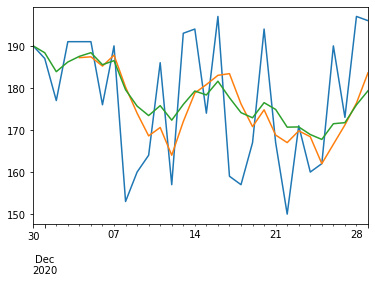

In [22]:
ts.plot()
ts.rolling(5).mean().plot()
ts.ewm(5).mean().plot();